In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline

# config
samples = 100
z = np.linspace(0.0,5.0,samples)
z1 = np.linspace(0.0,1000.0,1000)

# constants
H0 = 72.0 # [km/s/Mpc]
omegaM = 0.27
omegaL = 0.73
omegaR = 8.4E-5
c = 2.998E5 # [km/s]
K = 0.0

# calculated constants
D_H = c/H0

# functions
def E_of_Z(z):
    E_z = np.power(( (omegaR*np.power((1.0+z),4.0)) + (omegaM*np.power((1.0+z),3.0)) + omegaL ),0.5)
    return E_z

# integrating function
function = lambda z: D_H/E_of_Z(z)

D_c = []

for i in range(samples):
    answer = integrate.quad(function, 0.0, 5.0*((i+0.0)/samples))
    D_c.append(answer[0])

D_A = D_c/(1+z)
D_L = D_c*(1+z)   
    
# imported data
d1 = np.genfromtxt('hubble1.dat', skip_header=1, usecols=(2))
v1 = np.genfromtxt('hubble1.dat', skip_header=1, usecols=(3))
d2 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(4))
v2_0 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(5))
d2_0 = np.genfromtxt('hubble2.dat', skip_header=1, usecols=(4))
v2 = range(len(v2_0))

# sorting data by distance
d2.sort()
for i in range(len(d2)):
    for j in range(len(d2)):
        if d2_0[j] == d2[i]:
            v2[i] = v2_0[j]

d3 = np.genfromtxt('hubble2_1.dat', skip_header=1, usecols=(4))
v3 = np.genfromtxt('hubble2_1.dat', skip_header=1, usecols=(5))

Hubble Constant: 453.859994085


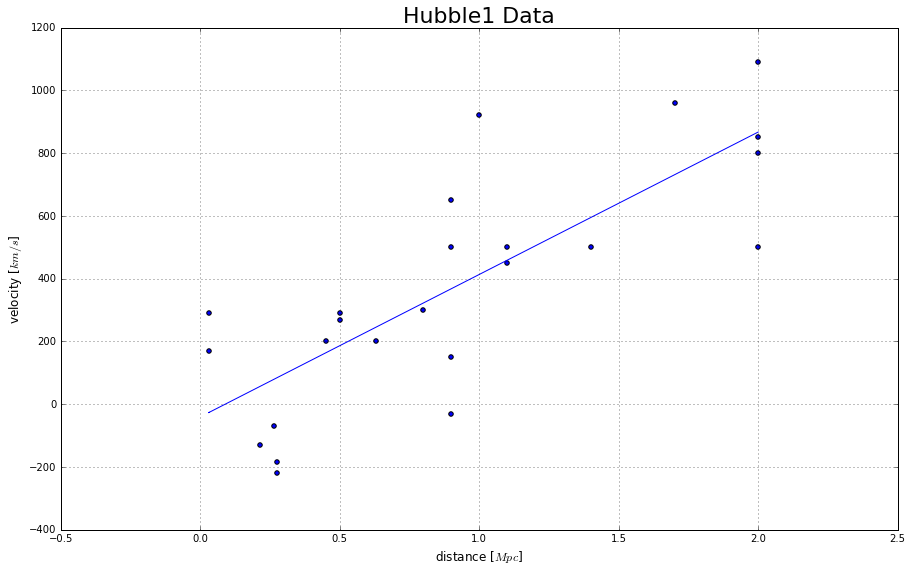

In [2]:
print 'Hubble Constant: ' +str(np.polyfit(d1, v1, 1)[0])

plt.figure(figsize=(15,9))
plt.scatter(d1, v1)
plt.plot(d1, np.poly1d(np.polyfit(d1, v1, 1))(d1))
plt.grid(True)
plt.xlabel('distance [$Mpc$]',fontsize=12)
plt.ylabel('velocity [$km/s$]',fontsize=12)
plt.title('Hubble1 Data',fontsize=22)
plt.show()

Hubble Constant: 95.3815270598


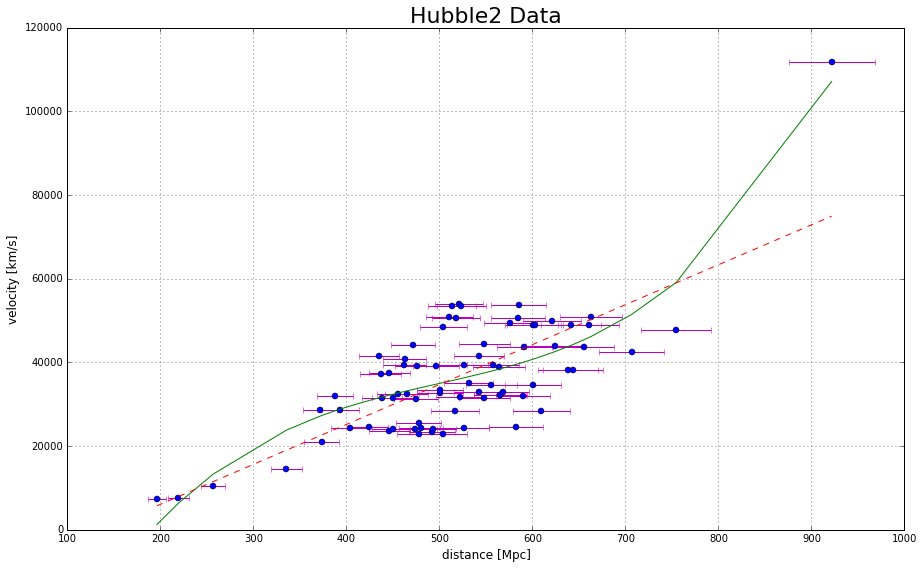

In [3]:
print 'Hubble Constant: ' +str(np.polyfit(d2, v2, 1)[0])

plt.figure(figsize=(15,9))
plt.errorbar(d2, v2, xerr=d2*0.05, fmt='o', ecolor='m')
plt.plot(d2, np.poly1d(np.polyfit(d2, v2, 3))(d2))
plt.plot(d2, np.poly1d(np.polyfit(d2, v2, 1))(d2), linestyle='--')
plt.grid(True)
plt.xlabel('distance [Mpc]',fontsize=12)
plt.ylabel('velocity [km/s]',fontsize=12)
plt.title('Hubble2 Data',fontsize=22)
plt.show()

Hubble Constant: 75.1994688883


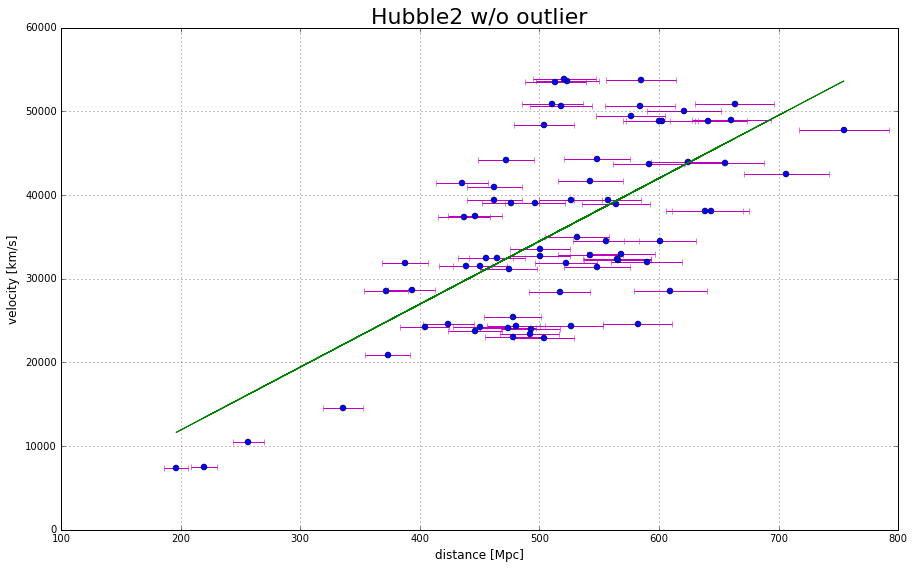

In [4]:
print 'Hubble Constant: ' +str(np.polyfit(d3, v3, 1)[0])

plt.figure(figsize=(15,9))
#plt.scatter(d3, v3)
plt.errorbar(d3, v3, xerr=d3*0.05, fmt='o', ecolor='m')
plt.plot(d3, np.poly1d(np.polyfit(d3, v3, 1))(d3))
plt.grid(True)
plt.xlabel('distance [Mpc]',fontsize=12)
plt.ylabel('velocity [km/s]',fontsize=12)
plt.title('Hubble2 w/o outlier',fontsize=22)
plt.show()

# 1 Hubble’s Law

(a) The Hubble constants are printed above each corresponding graph.

(b) Hubble2.dat is much more consistent. Hubble1.dat is way off, this is because the measurements and estimates where not very good. Also, the objects are not far enough away and many are gravitationally bound, so many are moving toward us, this increases the slope of the line, which is s measure of the Hubble constant significantly. The distance is most uncertain for both data files. In order to get a more accurate estimate of the Hubble constant from the Hubble2.dat we would need better distance measurements and would need to take into account GR.

(c) 

# 2 Cosmic Dynamics: the Friedmann Equations

(a) We must consider GR when the speeds are relativistic and more importnantly in the more distance Universe where the global geometry (curvature) was more significant. So the Newtonian approach is okay below the Mpc scale.

(b) Deriving the equation of motion below:

$$F = -\frac{GMm}{r^{2}},\ and\ F = ma,\ where\ \ddot r = x\ddot a\ $$

This gives,

$$-\frac{GM}{x^{2}a^{2}} = x\ddot a,\ also\ note:\ \rho = \frac{M}{\frac{4}{3}\pi r^{3}}\quad \Rightarrow \quad M = \frac{4}{3}\rho \pi x^{3}a^{3}$$

Therefore, the equation of motion is,

$$\boxed{\ddot a(t) = -\frac{4}{3}G\rho (t)\pi a(t)}$$

(c) Multiplying the above equation with $\dot a(t)\ $ and integrating we have (after substituting M back in for $\rho$):

$$\int \dot a d\dot a = -\int \frac{GM}{x^{3}a^{2}}da$$

solving and subbing back in $\rho$, we get,

$$\frac{1}{2}\dot a^{2} = \frac{4}{3}G\rho \pi a^{2} + K\quad \Rightarrow \quad \boxed{\Bigg[\frac{\dot a^{2}}{a^{2}} - \frac{8}{3}G\rho \pi\Bigg]a^{2}= K}\ $$

# 3 The Age Problem

The observed age of the oldest globular clusters, $13\ Gyr\    $, and the Hubble Constant, $68\  km/s/Mpc\    $ together place an interesting constraint on the density of a pure matter Universe.

(a) What is the Hubble time: $t_{H,0}\    $?

$$t_{H,0} = \frac{1}{H_{0}} = \Big(\frac{1}{68\ km/s/Mpc}\Big)\Big(\frac{3.086E19\ km}{1\ Mpc}\Big) = 4.54E17\ s =  \boxed{14.4\ billion\ years}\ $$

(b) What is tage for $\Omega_{m} $ = 0 (empty) and 1 (flat; Einstein-de Sitter). Hint: write down $dt $ in terms of $da $ and integrate.

$$H(a) = \frac{\dot{a}}{a}\quad \Rightarrow\quad dt = \frac{da}{aH(a)}\quad where,\ H(a) = H_{0}\sqrt{a^{-4}\Omega_{r} + a^{-3}\Omega_{m} + a^{-2}(1 - \Omega_{m} - \Omega_{\Lambda}) + \Omega_{\Lambda}}$$

Since we're constrained to a pure matter Universe, $\Omega_{r} = \Omega_{\Lambda} = 0$ and we integrate from 0 to 1:

$$t = \int_{0}^{1}\frac{1}{H_{0}}(a^{-1}\Omega_{m} - \Omega_{m} + 1)^{-\frac{1}{2}}da$$

Now, for $\Omega = 0$:

$$t_{\Omega_{m}=0} =  \int_{0}^{1}\frac{1}{H_{0}}da = \frac{1}{H_{0}} =  \boxed{14.4\ billion\ years}\ $$

and now, for $\Omega = 1$:

$$t_{\Omega_{m}=1} =  \int_{0}^{1}\frac{a^{\frac{1}{2}}}{H_{0}}da = \frac{2}{3}\Big(\frac{1}{H_{0}}\Big) =  \boxed{9.6\ billion\ years}\ $$


(c) Calculate age for current $\Omega_{m} $ = 0.27. What age does this give? Do you now see why there was an ”age problem” with pure matter models?

For $\Omega = 0.27$:

$$t_{\Omega_{m}=0.27} =  \int_{0}^{1}\frac{1}{H_{0}}(0.73 + 0.27(a^{-1}))^{-\frac{1}{2}}da = 0.82\Big(\frac{1}{H_{0}}\Big) =  \boxed{11.8\ billion\ years}\ $$

These ages, given by a pure matter model of the Universe, are obviously too small.

# 4 Concordance Model

(a), (b), and (c) are plotted below:

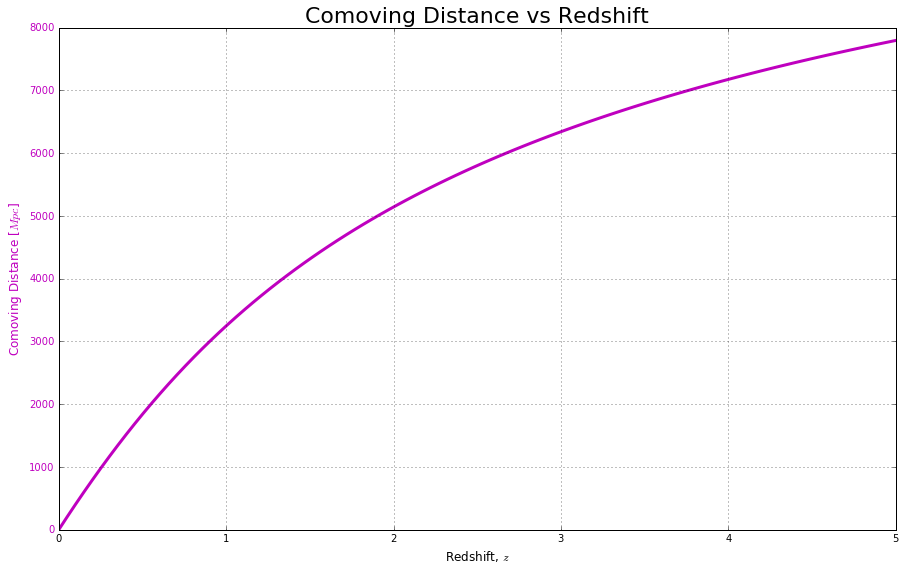

In [5]:
plt.figure(figsize=(15,9))
plt.plot(z, D_c, 'm', linewidth=3)
plt.grid(True)
plt.xlim(0,5)
plt.ylim(0,8000)
plt.xlabel('Redshift, $z$',fontsize=12)
plt.ylabel('Comoving Distance [$Mpc$]',fontsize=12, color='m')
[i.set_color('m') for i in plt.gca().get_yticklabels()]
plt.title('Comoving Distance vs Redshift',fontsize=22)
plt.show()

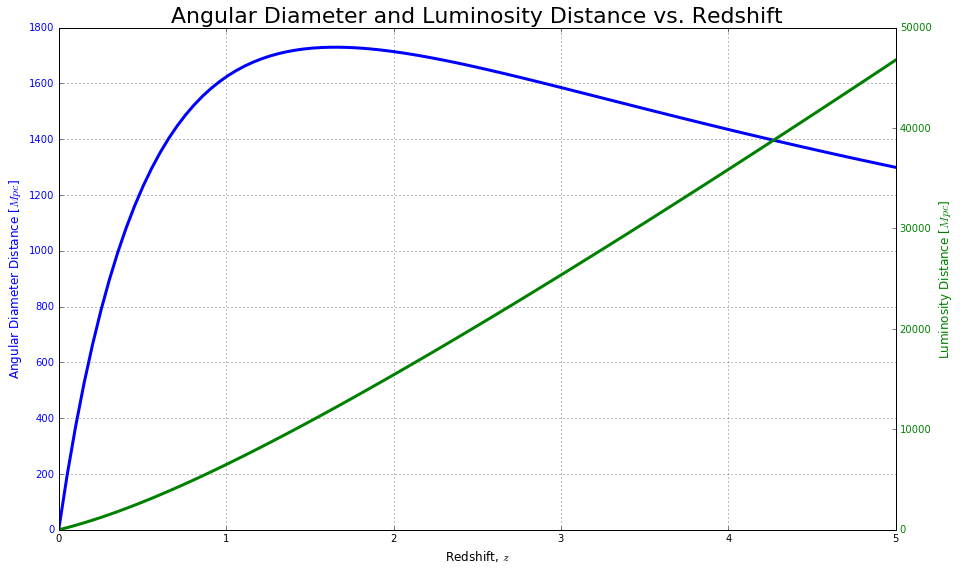

In [6]:
fig, ax1 = plt.subplots(figsize=(15,9))
plt.grid(True)
plt.title('Angular Diameter and Luminosity Distance vs. Redshift',fontsize=22)
ax1.plot(z, D_A, 'b', linewidth=3, label='Angular Diameter Distance')
ax1.set_xlabel('Redshift, $z$',fontsize=12)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Angular Diameter Distance [$Mpc$]', fontsize=12, color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(z, D_L, 'g', linewidth=3, label='Luminosity Distance')
ax2.set_ylabel('Luminosity Distance [$Mpc$]', fontsize=12, color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.show()

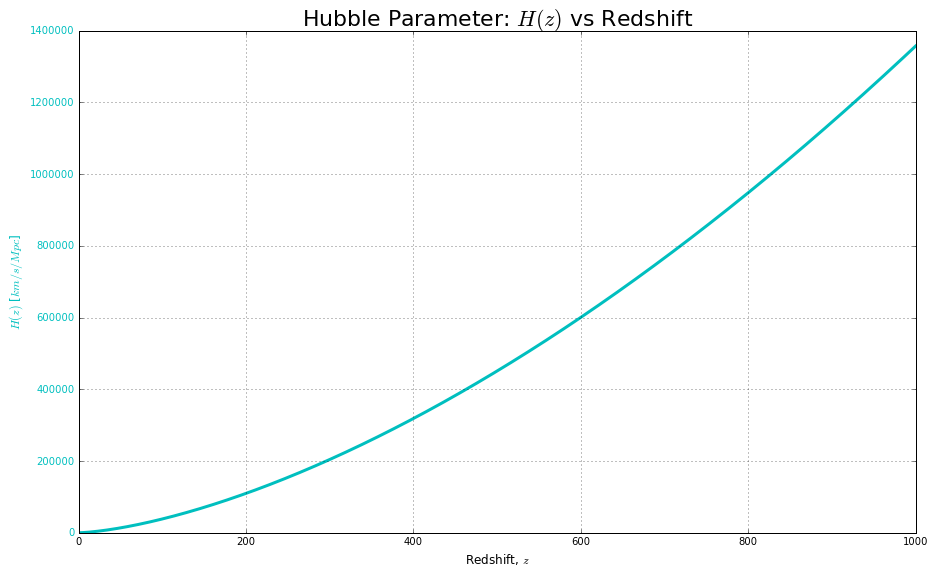

In [7]:
plt.figure(figsize=(15,9))
plt.plot(z1, H0*E_of_Z(z1), 'c', linewidth=3)
plt.grid(True)
plt.xlim(0,1000)
plt.ylim(0,1400000)
plt.xlabel('Redshift, $z$',fontsize=12)
plt.ylabel('$H(z)$ [$km/s/Mpc$]',fontsize=12, color='c')
[i.set_color('c') for i in plt.gca().get_yticklabels()]
plt.title('Hubble Parameter: $H(z)$ vs Redshift',fontsize=22)
plt.show()